## Intro 

In this notebook, we will:

1. Get a little practice with [NumPy](https://numpy.org/) and [Pandas](https://pandas.pydata.org/)

2. Keep building intuitions about the geometry of data

3. Practice with vector notation and vector operations, and learn to type math notation in Jupyter notebooks

All of that will get us ready for next week, when we will formalize our intuitions about geometric distance into mathematical formulas, which we will apply in towards our first ML method, K-nearest neighbors. 

In [1]:
# Step one: You should have numpy and pandas installed. If you used conda, you should already have these libraries

# make sure this code runs 
import numpy as np
import pandas

# If numpy and pandas are totally new to you, I suggest doing a quick tutorial to get set up
# There are many, many tutorials for these libraries available online. This course won't focus on 
# installing and using numpy and pandas.

In [2]:
import pandas as pd

# this line tells Jupyter notebook to show plots in the notebook
%matplotlib inline 

df = pd.read_csv("covid.csv")  # import some data, available on canvas
df

,state/region,population,num_positive,governor_party
0,AL,4833722,108433,republican
1,AK,735132,5060,republican
2,AZ,6626624,193537,republican
3,AR,2959373,52665,republican
4,CA,38332521,621562,democrat
5,CO,5268367,52838,democrat
6,CT,3596080,50897,democrat
7,DE,925749,16451,democrat
8,FL,19552860,573416,republican
9,GA,9992167,237030,republican


In [3]:
# Examine the dataframe and answer the following questions

# 1. How many features are there?


# 2. How many observations are there? 

# There are four features and 50 observations.

In [4]:
df_as_matrix = df.to_numpy() # This converts the pandas dataframe to a numpy library

# What is the size of `df_as_matrix`? 
# The size of a matrix is the number of rows and columns in the matrix
# hint: https://numpy.org/devdocs/reference/generated/numpy.shape.html
np.shape(df_as_matrix)

# 50 x 4

(50, 4)

In [5]:
# What does the 4th row of df_as_matrix represent? 
# - Remember that numbering starts at 0 so the 1st row has index 0. 

fourth_row = df_as_matrix[3]
# type your code here, filling the variable fourth_row

# What does fourth_row represent, in the dataset? 

# The fourth row represents the Arkansas observation.

In [6]:
# What is the 2nd column of df_as_matrix?  
#  - Remember that numbering starts at 0, so the 1st row has index 0. 

second_col = df_as_matrix[:,1]   

# What second_col represent, in the dataset? 

# The second column represents the population of the state.

### Plotting states by population

Now let's go ahead and plot states by population. Remember that population is just one dimension in the dataset. We're starting with population because it's *way* easier to think in one dimension than in, say, seven dimensions. However, by next week you will have tools to reason about data in an arbitrary number of dimensions.

In [7]:
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/15943945/annotate-scatterplot-from-a-pandas-dataframe

def plotdf1D(df_):
    '''
    YOU DONT NEED TO MODIFY THIS FUNCTION 

    This function makes a 1D scatter plot of the data, along the population dimension
    '''
    
    plt.clf()
    
    df_ = df_.copy()
    df_["_"] = 0

    plt.scatter(df_['population'],df_["_"])
    
    plt.ylim(-.01, .01)
    
    plt.xlabel("Population (Millions)")
    
    # zip joins x and y coordinates in pairs
    for x,y,z in zip(df_["population"], df_["_"], df_["state/region"]):

        plt.yticks(color='w')

        plt.annotate(z, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    plt.show()

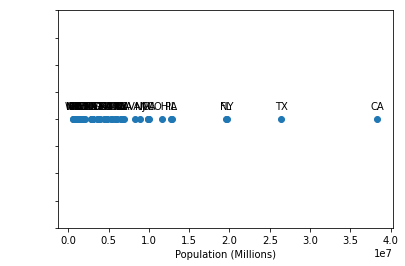

In [8]:
# Try plotting all of the states by population. 
# The plot is a bit crowded. 
plotdf1D(df)

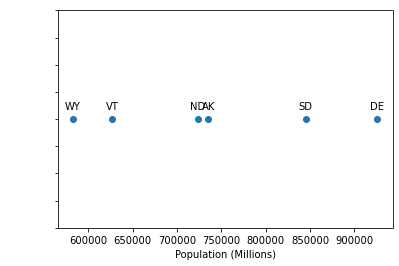

In [9]:
# Filter your dataframe to states with fewer than 1M people
# hint: this requires filtering the dataframe with pandas


less_than_1M = df.iloc[second_col< 1000000] # this variable should be a dataframe of states with fewer than 1M people

# and plot it

plotdf1D(less_than_1M)

#### Just eyeballing the plot of states with fewer than 1M people, which state is closest to Vermont along the population dimension?

Wyoming

In [10]:
# Now lets represent each state as a 1D vector, with one dimension, for population

population_vectors = df["population"].to_numpy()
population_vectors.size

# What is the size of "population_vectors"? 

# 50

# What do the rows represent in population_vectors? 

# Each of the 50 states.

# What do the columns represent in population_vectors? 

# The population of each state.

50

#### Practice with math in Jupyter notebooks

In this class, we will write a bit of math in Jupyter notebooks. 
- To write math in notebooks, you use dollar signs `$like this$`. 
- We will use bold letters to represent vectors. For instance, this represents a vector $\boldsymbol q$ 
    - (You can double click the cell to see the dollar signs, showing how to render the symbol). 
- We will use $\boldsymbol q_i$ to refer to component $i$ of vector $\boldsymbol q$.
- So if $\boldsymbol q = <11,2,31>$ then $\boldsymbol q_0$ = 11 and $\boldsymbol q_2$ = 31

Let the vector $\boldsymbol x$ represent `population_vectors` expressed in vector notation. 

1. What is $\boldsymbol x_{23}$ ? 

The cell in the second row, third column

2. How would you represent the population of Colorado, using vector notation? 

$\boldsymbol x_{62}$

### Increasing the dimensions

Now let's plot the data in two dimensions instead of one

In [11]:
def plotdf2D(df_):
    '''
    YOU DONT NEED TO MODIFY THIS FUNCTION 

    This function makes a 2D scatter plot of the data, along the population dimension
    '''
    
    plt.clf()
    
    df_ = df_.copy()

    plt.scatter(df_['population'],df_["num_positive"])
    
    plt.xlabel("Population (Millions)")
    plt.ylabel("# Cases")
    
    # zip joins x and y coordinates in pairs


    for x,y,z in zip(df_["population"], df_["num_positive"], df_["state/region"]):

        plt.annotate(z, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

    plt.show()


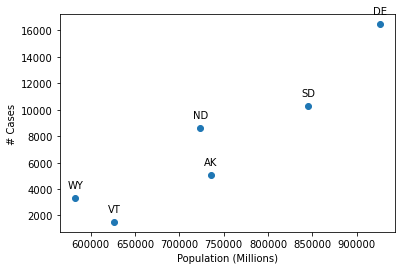

In [12]:
plotdf2D(less_than_1M)

Use the `plotdf2D` function to plot the data in two dimensions, then answer the following questions

1. What state is closest to North Dakota (ND) in overall in feature space (i.e. shortest line between points)?

Alaska

2. What state is closest to North Dakota (ND) along the #Cases dimension?

South Dakota

2. What state is closest to North Dakota (ND) along the Population dimension?

Alaska

#### Turning in your work 

For this assignment, you will turn in your .ipynb notebook file and a PDF of the notebook. Click Kernel → Restart & Run All and then click File → Download As → PDF to make a nice PDF of the notebook. Turn in both the .ipynb and .pdf files for assignment 2 on Canvas.